# KOVO 배구리그 24 - 25 시즌 순위예측 회귀모델

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [42]:
table_data = pd.read_csv("./팀별 데이터.csv")
table_data

,시즌,순위,팀,승점,승,패,득세트,실세트,세트득실률,득점,...,서브_범실,서브_세트당평균,블로킹_순위,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_어시스트,블로킹_세트당평균
0,23-24,1,현대건설,80,26,10,90,51,1.765,3173,...,227,0.96,1,2462,337,934,788,28,269,2.39
1,23-24,2,흥국생명,79,28,8,93,47,1.979,3245,...,243,1.19,3,2422,299,1014,690,37,219,2.14
2,23-24,3,정관장,61,20,16,74,63,1.175,3083,...,284,1.00,4,2212,292,874,687,30,220,2.13
3,23-24,4,GS칼텍스,51,18,18,63,69,0.913,2914,...,261,1.27,7,1913,221,712,668,33,177,1.67
4,23-24,5,IBK기업은행,51,17,19,70,71,0.986,3114,...,238,0.89,2,2512,330,1024,728,36,274,2.34
5,23-24,6,한국도로공사,39,12,24,58,85,0.682,3034,...,276,0.88,6,2295,278,807,819,45,228,1.94
6,23-24,7,페퍼저축은행,17,5,31,39,101,0.386,2840,...,302,0.72,5,2350,288,915,749,32,254,2.06
7,22-23,1,흥국생명,82,27,9,93,44,2.114,3201,...,288,1.06,6,2432,282,985,728,28,235,2.06
8,22-23,2,현대건설,70,24,12,87,56,1.554,3238,...,289,0.98,4,2541,345,1018,730,22,268,2.41
9,22-23,3,한국도로공사,60,20,16,77,67,1.149,3216,...,233,0.78,1,2628,406,912,807,50,329,2.82


In [43]:
table_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시즌         45 non-null     object 
 1   순위         45 non-null     int64  
 2   팀          45 non-null     object 
 3   승점         45 non-null     int64  
 4   승          45 non-null     int64  
 5   패          45 non-null     int64  
 6   득세트        45 non-null     int64  
 7   실세트        45 non-null     int64  
 8   세트득실률      45 non-null     float64
 9   득점         45 non-null     int64  
 10  실점         45 non-null     int64  
 11  점수득실률      45 non-null     float64
 12  연속         45 non-null     object 
 13  공격_순위      45 non-null     int64  
 14  경기수        45 non-null     int64  
 15  세트수        45 non-null     int64  
 16  공격_시도      45 non-null     int64  
 17  공격_성공      45 non-null     int64  
 18  공격차단       45 non-null     int64  
 19  공격_범실      45 non-null     int64  
 20  공격_성공률     4

- "시즌", "팀", "연속" 이렇게 세 컬럼의 데이터타입이 object 이고 나머지는 수치형임을 알 수 있다.
- "팀" 은 원핫 인코딩, "시즌" 과 "연속" 컬럼은 수치형으로 변환하는 전처리를 진행해야 할 것 같다.

In [44]:
# '연속' 컬럼에서 승/패와 그 횟수를 추출하여 수치로 변환
def convert_streak(streak):
    if '승' in streak:
        return int(streak.replace('승', ''))  # 승리 연승
    elif '패' in streak:
        return -int(streak.replace('패', ''))  # 패배 연패

# 변환된 결과를 새로운 컬럼 '연속_수치'에 추가
table_data['연속_수치'] = table_data['연속'].apply(convert_streak)
table_data = table_data.drop(['연속'], axis = 1)  # 기존 "연속" 컬럼 제거

In [45]:
# '시즌' 컬럼에서 시작 연도 추출 및 수치형으로 변환
table_data['시즌'] = table_data['시즌'].str.split('-').str[0].astype(int) + 2000  # 2000을 더하여 연도로 변환

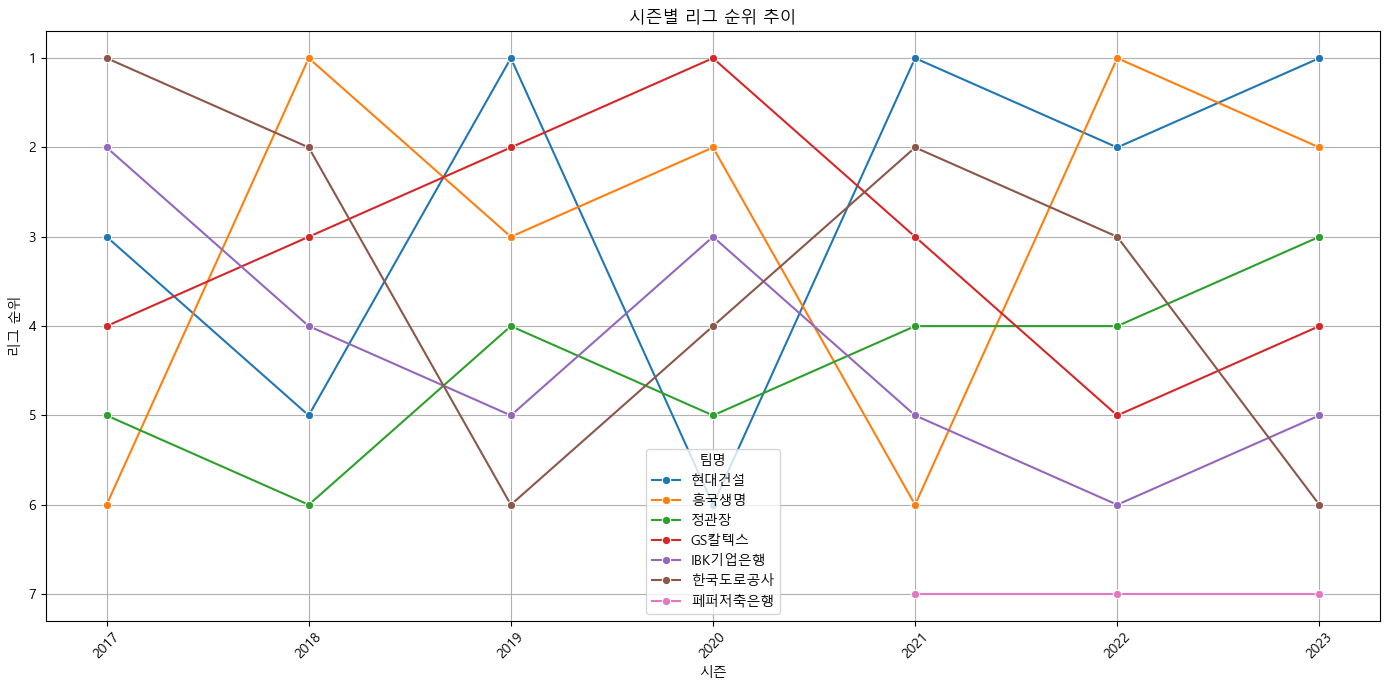

In [48]:
# 팀별 시즌 순위 데이터프레임 생성
season_rankings = table_data[['팀', '시즌', '순위']].copy()

# 시각화
plt.figure(figsize=(14, 7))
sns.lineplot(data=season_rankings, x='시즌', y='순위', hue='팀', marker='o')

# y축을 역순으로 설정 (순위는 낮을수록 더 좋은 성적)
plt.gca().invert_yaxis()

# 그래프 제목 및 레이블 설정
plt.title('시즌별 리그 순위 추이')
plt.xlabel('시즌')
plt.ylabel('리그 순위')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend(title='팀명')
plt.grid(True)
plt.tight_layout()

# 그래프 보여주기
plt.show()

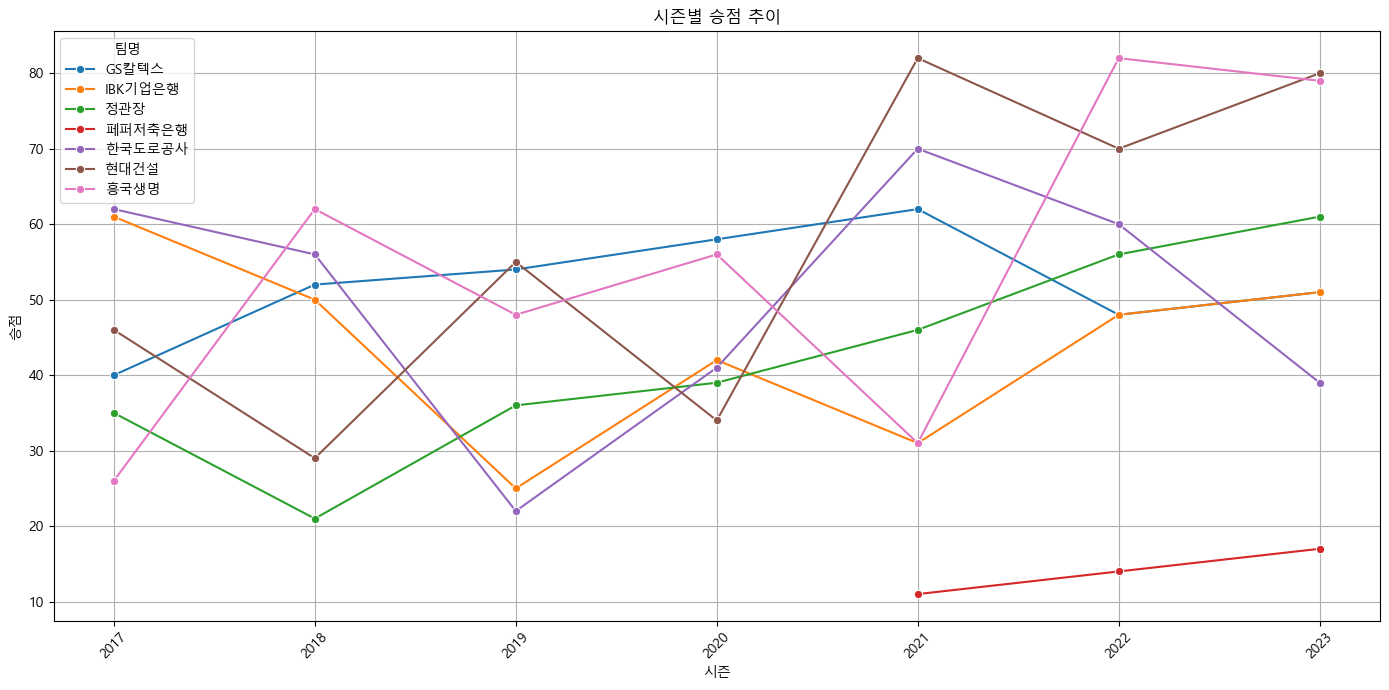

In [47]:
# 팀별 시즌 승점 데이터프레임 생성
season_points = table_data.groupby(['팀', '시즌'])['승점'].sum().reset_index()

# 시각화
plt.figure(figsize=(14, 7))
sns.lineplot(data=season_points, x='시즌', y='승점', hue='팀', marker='o')

# 그래프 제목 및 레이블 설정
plt.title('시즌별 승점 추이')
plt.xlabel('시즌')
plt.ylabel('승점')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend(title='팀명')
plt.grid(True)
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [36]:
# "팀" 컬럼을 원핫 인코딩하고 기존 "팀" 컬럼을 제거
encoded = pd.get_dummies(table_data['팀'], prefix='팀명')
table_data = pd.concat([table_data, encoded], axis=1)
table_data = table_data.drop(['팀'], axis = 1)  # 기존 "팀" 컬럼 제거

In [37]:
table_data.head()

,시즌,순위,승점,승,패,득세트,실세트,세트득실률,득점,실점,...,블로킹_어시스트,블로킹_세트당평균,연속_수치,팀명_GS칼텍스,팀명_IBK기업은행,팀명_정관장,팀명_페퍼저축은행,팀명_한국도로공사,팀명_현대건설,팀명_흥국생명
0,2023,1,80,26,10,90,51,1.765,3173,2945,...,269,2.39,1,False,False,False,False,False,True,False
1,2023,2,79,28,8,93,47,1.979,3245,2981,...,219,2.14,2,False,False,False,False,False,False,True
2,2023,3,61,20,16,74,63,1.175,3083,2981,...,220,2.13,-2,False,False,True,False,False,False,False
3,2023,4,51,18,18,63,69,0.913,2914,2933,...,177,1.67,-3,True,False,False,False,False,False,False
4,2023,5,51,17,19,70,71,0.986,3114,3073,...,274,2.34,2,False,True,False,False,False,False,False


In [38]:
table_data.dtypes

시즌              int32
순위              int64
승점              int64
승               int64
패               int64
득세트             int64
실세트             int64
세트득실률         float64
득점              int64
실점              int64
점수득실률         float64
공격_순위           int64
경기수             int64
세트수             int64
공격_시도           int64
공격_성공           int64
공격차단            int64
공격_범실           int64
공격_성공률        float64
서브_순위           int64
서브_시도           int64
서브_성공           int64
서브_범실           int64
서브_세트당평균      float64
블로킹_순위          int64
블로킹_시도          int64
블로킹_성공          int64
블로킹_유효블락        int64
블로킹_실패          int64
블로킹_범실          int64
블로킹_어시스트        int64
블로킹_세트당평균     float64
연속_수치           int64
팀명_GS칼텍스         bool
팀명_IBK기업은행       bool
팀명_정관장           bool
팀명_페퍼저축은행        bool
팀명_한국도로공사        bool
팀명_현대건설          bool
팀명_흥국생명          bool
dtype: object

- 모두 수치형으로 바꿔주어 데이터분석 및 모델링할 준비가 되었다.
- 컬럼들과의 관계를 시각화하여 보면 좋을 것 같다.
- 마지막으로 순위를 예측하는 회귀 모델에서 독립변수가 될 컬럼을 정하기 위해 다중상관분석을 통해 모델의 종속변수가 될 "순위" 와의 상관계수를 알아볼 것이다.

In [9]:
cor_cols = table_data.columns[:]
table_data_corr = table_data[cor_cols].corr()
td_corr = table_data_corr.loc["순위", :]
td_corr

시즌            0.116280
순위            1.000000
승점           -0.871195
승            -0.880531
패             0.935345
득세트          -0.819794
실세트           0.892668
세트득실률        -0.877686
득점           -0.265030
실점            0.349977
점수득실률        -0.899046
공격_순위         0.700255
경기수           0.111772
세트수           0.038984
공격_시도         0.085524
공격_성공        -0.217208
공격차단          0.418273
공격_범실         0.359604
공격_성공률       -0.613861
서브_순위         0.617347
서브_시도        -0.225734
서브_성공        -0.579151
서브_범실         0.028115
서브_세트당평균     -0.519513
블로킹_순위        0.572704
블로킹_시도       -0.071070
블로킹_성공       -0.313507
블로킹_유효블락     -0.085825
블로킹_실패        0.110250
블로킹_범실        0.152332
블로킹_어시스트     -0.234782
블로킹_세트당평균    -0.479269
연속_수치        -0.263193
팀명_GS칼텍스     -0.135767
팀명_IBK기업은행    0.127007
팀명_정관장        0.159854
팀명_페퍼저축은행     0.467707
팀명_한국도로공사    -0.070073
팀명_현대건설      -0.234307
팀명_흥국생명      -0.168613
Name: 순위, dtype: float64

C:\Users\ohsum\AppData\Local\Temp\ipykernel_31848\3729189303.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


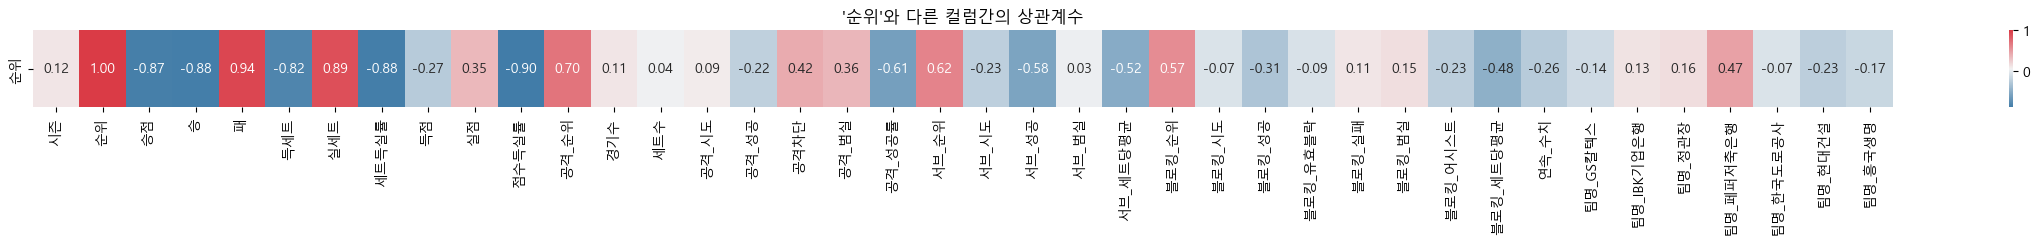

In [10]:
# 한글 폰트 설정
# 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False  # 음수 기호 정상 표시

# 히트맵 시각화
plt.figure(figsize=(30, 1))
sns.heatmap(td_corr.values.reshape(1, -1), 
            cmap=sns.diverging_palette(240, 10, as_cmap=True),  # 파스텔톤의 푸른색과 붉은색 팔레트
            annot=True, 
            fmt=".2f", 
            cbar=True, 
            yticklabels=["순위"], 
            xticklabels=td_corr.index)

plt.title("'순위'와 다른 컬럼간의 상관계수")
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

- 상관계수가 0.6 이상인 컬럼들, 0.7 이상인 컬럼들로 각각 모델을 만들어 성능을 비교해보면 좋을 것 같다
  - '순위'와의 상관계수가 0.6 이상인 컬럼들
    - 승점
    - 승
    - 패
    - 득세트
    - 실세트
    - 세트득실률
    - 점수득실률
    - 공격_순위
    - 공격_성공률
    - 서브_순위
    - (총 10개)
      
  - 상관계수가 0.7 이상인 컬럼들
    - 승점
    - 승
    - 패
    - 득세트
    - 실세트
    - 세트득실률
    - 점수득실률
    - 공격_순위
    - (총 8개)

In [11]:
# 상관계수 0.6 이상
df1 = table_data[["순위", "승점", "승", "패", "득세트", "실세트", "세트득실률", "점수득실률", "공격_순위", "공격_성공률", "서브_순위"]]
# 상관계수 0.7이상
df2 = table_data[["순위", "승점", "승", "패", "득세트", "실세트", "세트득실률", "점수득실률", "공격_순위"]]

## 모델링

In [12]:
x1 = df1.drop("순위", axis = 1)  # 독립 변수
y1 = df1["순위"]  # 종속 변수

x2 = df2.drop("순위", axis = 1)  # 독립 변수
y2 = df2["순위"]  # 종속 변수

In [13]:
# 데이터셋 분할
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, stratify = y1, random_state = 12)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, stratify = y2, random_state = 12)

In [14]:
model1 = LinearRegression()
model1.fit(x1_train, y1_train)

LinearRegression()

In [15]:
model2 = LinearRegression()
model2.fit(x2_train, y2_train)

LinearRegression()

In [16]:
print(model1.score(x1_train, y1_train), model1.score(x1_test, y1_test))
print(model2.score(x2_train, y2_train), model2.score(x2_test, y2_test))

0.9089179116726159 0.6969030057207348
0.9085269406042681 0.7105127300764571


- 상관계수가 0.7이상인 컬럼을 독립변수로 한 model2가 성능이 더 좋은 것 같다.

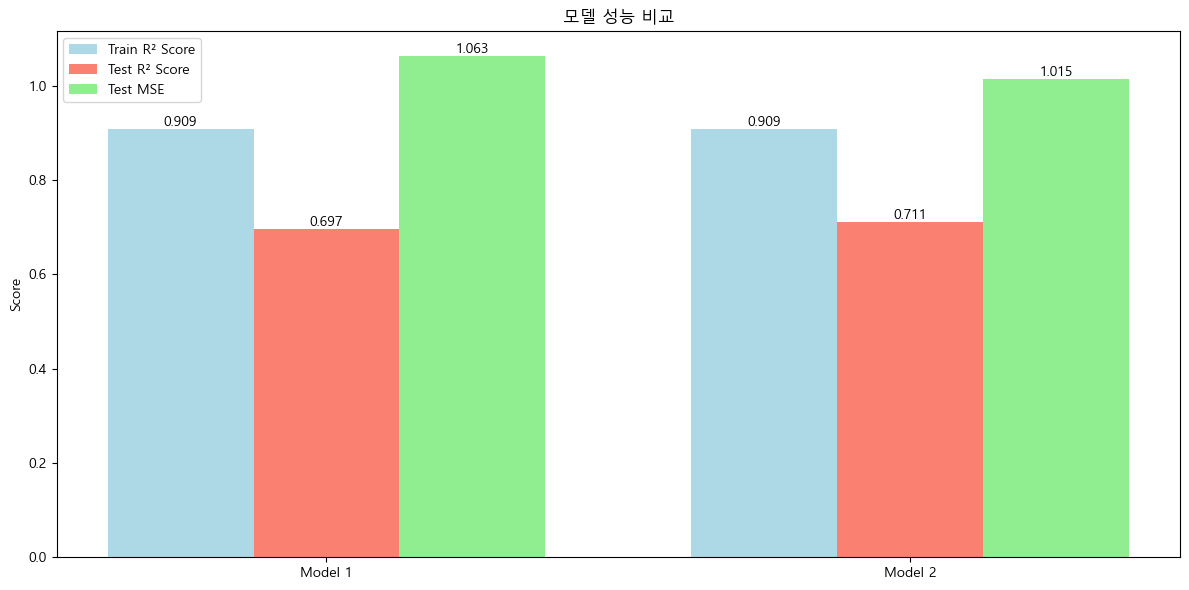

In [17]:
# 예측값 생성
y1_pred_train = model1.predict(x1_train)
y1_pred_test = model1.predict(x1_test)
y2_pred_train = model2.predict(x2_train)
y2_pred_test = model2.predict(x2_test)

# MSE 계산
mse1_train = mean_squared_error(y1_train, y1_pred_train)
mse1_test = mean_squared_error(y1_test, y1_pred_test)
mse2_train = mean_squared_error(y2_train, y2_pred_train)
mse2_test = mean_squared_error(y2_test, y2_pred_test)

# 성능 데이터 준비
models = ['Model 1', 'Model 2']
train_scores = [model1.score(x1_train, y1_train), model2.score(x2_train, y2_train)]
test_scores = [model1.score(x1_test, y1_test), model2.score(x2_test, y2_test)]
mse_scores = [mse1_test, mse2_test]  # 테스트 세트에 대한 MSE만 포함

# 바 차트 생성
bar_width = 0.25
index = np.arange(len(models))

plt.figure(figsize=(12, 6))

# R² 점수 바 차트
plt.bar(index, train_scores, bar_width, label='Train R² Score', color='lightblue')
plt.bar(index + bar_width, test_scores, bar_width, label='Test R² Score', color='salmon')

# MSE 바 차트
plt.bar(index + 2 * bar_width, mse_scores, bar_width, label='Test MSE', color='lightgreen')

# 레이블 및 타이틀 설정
plt.ylabel('Score')
plt.title('모델 성능 비교')
plt.xticks(index + bar_width, models)  # x축 레이블 설정
plt.legend()

# 바에 값 추가
def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom')

# R² 점수에 값 추가
add_value_labels(plt.bar(index, train_scores, bar_width, color='lightblue'))
add_value_labels(plt.bar(index + bar_width, test_scores, bar_width, color='salmon'))
# MSE에 값 추가
add_value_labels(plt.bar(index + 2 * bar_width, mse_scores, bar_width, color='lightgreen'))

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [18]:
test_data = pd.read_csv("./data_24_25.csv")

In [19]:
test_data

,순위,팀,승점,승,패,득세트,실세트,세트득실률,득점,실점,...,서브_범실,서브_세트당평균,블로킹_순위,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_어시스트,블로킹_세트당평균
0,7,GS칼텍스,6,1,12,14,37,0.378,1022,1208,...,103,1.18,4,794,109,280,262,14,90,2.14
1,4,IBK기업은행,22,8,5,27,23,1.174,1091,1070,...,87,1.22,6,887,88,400,254,6,69,1.76
2,3,정관장,23,8,6,31,25,1.240,1232,1217,...,104,1.38,3,891,135,324,290,7,110,2.41
3,5,페퍼저축은행,12,4,9,17,31,0.548,1003,1087,...,80,0.81,5,779,100,311,248,10,77,2.08
4,6,한국도로공사,10,3,11,18,37,0.486,1160,1282,...,122,1.22,7,869,97,315,319,8,80,1.76
5,2,현대건설,31,10,4,36,19,1.895,1292,1140,...,96,1.00,2,1070,138,426,324,8,112,2.51
6,1,흥국생명,37,13,0,39,10,3.900,1190,986,...,105,1.37,1,859,133,319,219,5,110,2.71


In [20]:
test_d = test_data[["승점", "승", "패", "득세트", "실세트", "세트득실률", "점수득실률", "공격_순위"]]

In [21]:
# 팀명과 예측된 순위를 데이터프레임으로 변환
team_names = test_data["팀"].values  # 팀명 저장

# 예측 수행
y_pred_test = model2.predict(test_d)

current_ranks = test_data["순위"]

# 예측된 순위를 1 ~ 7로 변환
predicted_ranks = y_pred_test.round().astype(int)
predicted_ranks = predicted_ranks.clip(1, 7)  # 1에서 7 사이로 제한

# 고유한 예측 순위를 만들기 위한 정렬
unique_ranks = np.unique(predicted_ranks)

# 고유 순위를 부여하기 위해 팀을 정렬
sorted_indices = np.argsort(predicted_ranks)
final_ranks = np.empty_like(predicted_ranks)

# 고유한 순위를 1부터 7까지 할당
for new_rank, index in enumerate(sorted_indices):
    final_ranks[index] = new_rank + 1  # 1부터 시작

# 팀명과 현재 순위를 포함한 데이터프레임 생성
result_df = pd.DataFrame({
    "팀명": team_names,  # 팀명 추가
    "현재 순위": current_ranks,  # 현재 순위 추가
    "예측 순위": final_ranks  # 조정된 예측 순위 추가
})

# 결과 출력
print(result_df[['팀명', '현재 순위', '예측 순위']])


        팀명  현재 순위  예측 순위
0    GS칼텍스      7      7
1  IBK기업은행      4      3
2      정관장      3      4
3   페퍼저축은행      5      5
4   한국도로공사      6      6
5     현대건설      2      1
6     흥국생명      1      2


## 로지스틱회귀

In [22]:
# 로지스틱 회귀 모델 학습
model_logi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 100000)
model_logi.fit(x2_train, y2_train)

LogisticRegression(max_iter=100000, multi_class='multinomial')

In [23]:
y_pred = model_logi.predict(x2_test)

In [24]:
# 성능 평가
accuracy = accuracy_score(y2_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.56


## KNN 분류모델

In [25]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x2_train)
scaled_test = ss.transform(x2_test)

In [26]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(scaled_train, y2_train)

KNeighborsClassifier(n_neighbors=10)

In [27]:
# test data 예측
y_pred = knn.predict(scaled_test)
pd.DataFrame({"ans" : y2_test, "pred" : y_pred})

,ans,pred
38,6,5
2,3,4
6,7,5
14,1,1
8,2,2
4,5,3
24,4,4
10,4,4
26,6,5


In [28]:
knn.score(scaled_test, y2_test)

0.4444444444444444

In [29]:
# test data 예측
y_pred = knn.predict(test_d)
pd.DataFrame({"ans" : result_df["현재 순위"], "pred" : y_pred})

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,ans,pred
0,7,6
1,4,1
2,3,1
3,5,6
4,6,6
5,2,1
6,1,1


In [30]:
test_d

,승점,승,패,득세트,실세트,세트득실률,점수득실률,공격_순위
0,6,1,12,14,37,0.378,0.846,7
1,22,8,5,27,23,1.174,1.020,4
2,23,8,6,31,25,1.240,1.012,3
3,12,4,9,17,31,0.548,0.923,6
4,10,3,11,18,37,0.486,0.905,5
5,31,10,4,36,19,1.895,1.133,1
6,37,13,0,39,10,3.900,1.207,2


In [31]:
# 예측 수행
y_pred = knn.predict(scaled_test)

# 예측된 순위를 조정
# 예측된 순위를 clip하여 1~7 사이로 제한
predicted_ranks = np.clip(y_pred, 1, 7)

# 고유한 순위를 만들기 위한 정렬
unique_ranks = np.unique(predicted_ranks)

# 고유 순위를 부여하기 위해 팀을 정렬
# sorted_indices = np.argsort(predicted_ranks) # 이 부분을 수정합니다.
final_ranks = np.empty_like(predicted_ranks)

# 고유한 순위를 1부터 7까지 할당
for new_rank in range(1, len(unique_ranks) + 1):
    index = np.where(predicted_ranks == unique_ranks[new_rank - 1])[0]
    final_ranks[index] = new_rank

# 팀명과 현재 순위를 포함한 데이터프레임 생성
result_df2 = pd.DataFrame({
    "팀명": test_data["팀"].values,  # 팀명 추가
    "현재 순위": test_data["순위"].values,  # 현재 순위 추가
    "예측 순위": final_ranks[:len(test_data)]  # 조정된 예측 순위 추가
})

# 결과 출력
print(result_df2[['팀명', '현재 순위', '예측 순위']])

        팀명  현재 순위  예측 순위
0    GS칼텍스      7      5
1  IBK기업은행      4      4
2      정관장      3      5
3   페퍼저축은행      5      1
4   한국도로공사      6      2
5     현대건설      2      3
6     흥국생명      1      4
